In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_decision_forests as tfdf 
from tensorflow.keras.models import load_model
import time 

In [26]:
test_starting_time = time.time()
test_df = pd.read_csv('../Data/binary_class/jet_images_c50_sort_hpT_pct_agg_test.csv', nrows = 15000)
test_load_time = time.time()-test_starting_time
print(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')

Loaded testing sample of 15000 jets in 101.269s


In [27]:
model = load_model('Models/Binary_class/BDT_c50_hpT_pct_agg/')

[INFO 2023-04-14T14:37:58.687055+02:00 kernel.cc:1214] Loading model from path Models/Binary_class/BDT_c50_hpT_pct_agg/assets/ with prefix 6dac29d60aa74430
[INFO 2023-04-14T14:37:59.401809+02:00 quick_scorer_extended.cc:873] The binary was compiled without AVX2 support, but your CPU supports it. Enable it for faster model inference.
[INFO 2023-04-14T14:37:59.404425+02:00 abstract_model.cc:1312] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 2023-04-14T14:37:59.405271+02:00 kernel.cc:1046] Use fast generic engine


In [28]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)

15/15 [==============================] - 15s 688ms/step - loss: 0.0000e+00 - accuracy: 0.9305


In [29]:
y_pred = model.predict(test_ds)
# print(y_pred)
y_test = test_df['class']

15/15 [==============================] - 13s 695ms/step


In [30]:
from sklearn.metrics import roc_curve, auc

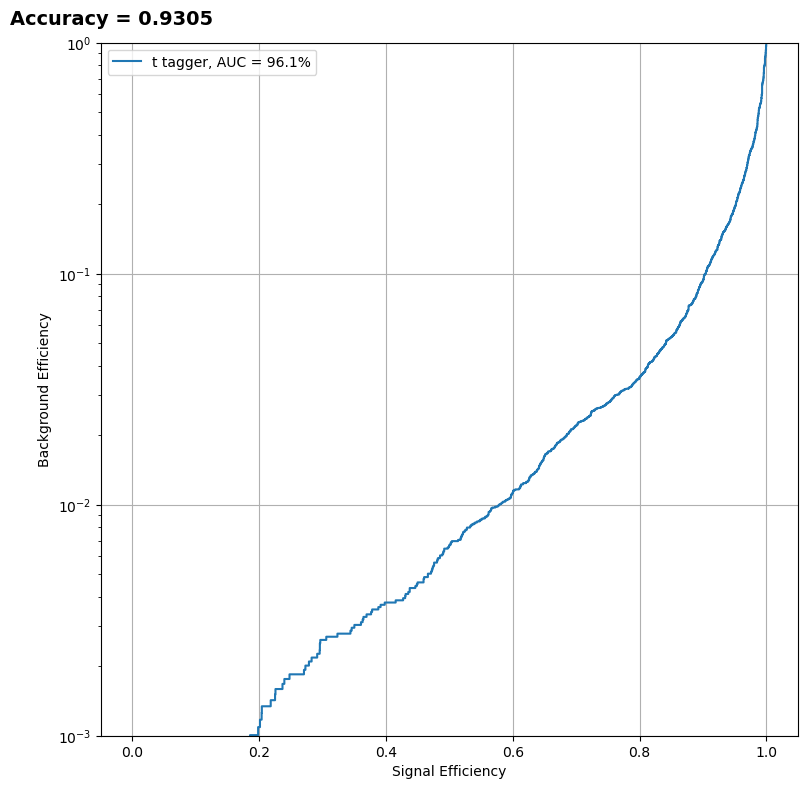

In [31]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
auc = auc(fpr,tpr)
#print('\n--------------------------------\n')

fig, ax = plt.subplots(figsize=(9, 9))
plt.plot(tpr,fpr, label = f't tagger, AUC = {auc*100:.1f}%')    
plt.semilogy()
plt.xlabel("Signal Efficiency")
plt.ylabel("Background Efficiency")
plt.ylim(0.001,1)
plt.grid(True)
plt.legend(loc='upper left')
plt.figtext(0.25, 0.90,f"Accuracy = {evaluation['accuracy']:.4f}",fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
plt.show()